In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_la = pd.read_csv('/Users/rush/Documents/Documents - Rushabh’s MacBook Air/Data/Crime Analysis LA /crime_rate_la.csv')

In [3]:
crime_la.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,3/1/20 00:00,3/1/20 00:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2/9/20 00:00,2/8/20 00:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/20 00:00,11/4/20 00:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,5/10/23 00:00,3/10/20 00:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,8/18/22 00:00,8/17/20 00:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


In [4]:
crime_la.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [5]:
crime_la.rename(columns={'DR_NO': 'dr_no',
                         'Date Rptd': 'date_reported', 
                         'DATE OCC': 'date_of_occurence',
                         'TIME OCC': 'time_of_occurence',
                         'AREA': 'area',
                         'AREA NAME': 'area_name',
                         'Rpt Dist No': 'subarea_dist_no',
                         'Part 1-2': 'part1-2',
                         'Crm Cd': 'crime_commited',
                         'Crm Cd Desc': 'crime_commited_description',
                         'Vict Age': 'victim_age',
                         'Vict Sex': 'victim_sex',
                         'Vict Descent': 'victim_descent',
                         'Premis Cd': 'crime_location',
                         'Premis Desc': 'crime_description',
                         'Weapon Used Cd': 'type_of_weapon',
                         'Weapon Desc': 'weapon_description',
                         'Status': 'status', 
                         'Status Desc': 'status_description',
                         'Crm Cd 1': 'crime_commited_1',
                         'LOCATION': 'location',
                         'LAT': 'latitude', 
                         'LON': 'longitude'}, inplace = True)

In [6]:
crime_la.drop(columns = ['time_of_occurence', 'area', 'subarea_dist_no', 'part1-2',
                         'crime_location', 'type_of_weapon', 'status', 'status_description',
                         'crime_commited_1'], inplace = True)
crime_la.head()

,dr_no,date_reported,date_of_occurence,area_name,crime_commited,crime_commited_description,victim_age,victim_sex,victim_descent,crime_description,weapon_description,location,latitude,longitude
0,190326475,3/1/20 00:00,3/1/20 00:00,Wilshire,510,VEHICLE - STOLEN,0,M,O,STREET,NaN,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2/9/20 00:00,2/8/20 00:00,Central,330,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/20 00:00,11/4/20 00:00,Southwest,480,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,5/10/23 00:00,3/10/20 00:00,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,8/18/22 00:00,8/17/20 00:00,Hollywood,354,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,1900 TRANSIENT,34.0944,-118.3277


In [7]:
crime_la.isnull().sum()

dr_no                              0
date_reported                      0
date_of_occurence                  0
area_name                          0
crime_commited                     0
crime_commited_description         0
victim_age                         0
victim_sex                    124206
victim_descent                124216
crime_description                562
weapon_description            610801
location                           0
latitude                           0
longitude                          0
dtype: int64

In [8]:
crime_la['victim_sex'].value_counts()

victim_sex
M    381415
F    340244
X     86169
H       105
-         1
Name: count, dtype: int64

In [9]:
crime_la['victim_sex'].fillna('X', inplace = True)
crime_la['victim_sex'].replace(['H', '-'], 'X', inplace=True)
crime_la['victim_sex'].value_counts()

victim_sex
M    381415
F    340244
X    210481
Name: count, dtype: int64

In [10]:
crime_la['victim_descent'].value_counts()

victim_descent
H    283151
W    188360
B    130445
X     94700
O     73525
A     20420
K      5143
F      4051
C      3751
J      1314
V       997
I       896
Z       466
P       251
U       192
D        77
G        67
L        65
S        51
-         2
Name: count, dtype: int64

In [11]:
crime_la['victim_descent'].replace(['-'], 'X', inplace=True)
crime_la['victim_descent'].fillna('O', inplace = True)
crime_la['victim_descent'].value_counts()

victim_descent
H    283151
O    197741
W    188360
B    130445
X     94702
A     20420
K      5143
F      4051
C      3751
J      1314
V       997
I       896
Z       466
P       251
U       192
D        77
G        67
L        65
S        51
Name: count, dtype: int64

In [12]:
crime_la['crime_description'].fillna('NA', inplace = True)
crime_la['weapon_description'].fillna('NA', inplace = True)

In [13]:
crime_la.isnull().sum().sum()

0

In [14]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dr_no                       932140 non-null  int64  
 1   date_reported               932140 non-null  object 
 2   date_of_occurence           932140 non-null  object 
 3   area_name                   932140 non-null  object 
 4   crime_commited              932140 non-null  int64  
 5   crime_commited_description  932140 non-null  object 
 6   victim_age                  932140 non-null  int64  
 7   victim_sex                  932140 non-null  object 
 8   victim_descent              932140 non-null  object 
 9   crime_description           932140 non-null  object 
 10  weapon_description          932140 non-null  object 
 11  location                    932140 non-null  object 
 12  latitude                    932140 non-null  float64
 13  longitude     

In [15]:
crime_la['date_reported'] = pd.to_datetime(crime_la['date_reported'])
crime_la['date_of_occurence'] = pd.to_datetime(crime_la['date_of_occurence'])

categorical_columns = ['area_name', 'victim_sex', 'victim_descent', 'crime_commited_description', 'crime_description', 'weapon_description', 'location']
for column in categorical_columns:
    crime_la[column] = crime_la[column].astype('category')

crime_la.dtypes

/var/folders/_z/p0hbn61s5z3208pzpn18xy5w0000gn/T/ipykernel_2755/2184193846.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_la['date_reported'] = pd.to_datetime(crime_la['date_reported'])
/var/folders/_z/p0hbn61s5z3208pzpn18xy5w0000gn/T/ipykernel_2755/2184193846.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_la['date_of_occurence'] = pd.to_datetime(crime_la['date_of_occurence'])


dr_no                                  int64
date_reported                 datetime64[ns]
date_of_occurence             datetime64[ns]
area_name                           category
crime_commited                         int64
crime_commited_description          category
victim_age                             int64
victim_sex                          category
victim_descent                      category
crime_description                   category
weapon_description                  category
location                            category
latitude                             float64
longitude                            float64
dtype: object

In [16]:
crime_la.drop(crime_la[crime_la['victim_age'] < 1].index, axis = 0, inplace = True)

In [17]:
crime_la.head()

,dr_no,date_reported,date_of_occurence,area_name,crime_commited,crime_commited_description,victim_age,victim_sex,victim_descent,crime_description,weapon_description,location,latitude,longitude
1,200106753,2020-02-09,2020-02-08,Central,330,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NA,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,Southwest,480,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NA,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NA,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,Hollywood,354,THEFT OF IDENTITY,28,M,H,SIDEWALK,NA,1900 TRANSIENT,34.0944,-118.3277
5,231808869,2023-04-04,2020-12-01,Southeast,354,THEFT OF IDENTITY,41,M,H,SINGLE FAMILY DWELLING,NA,9900 COMPTON AV,33.9467,-118.2463


In [18]:
crime_la.describe()

,dr_no,date_reported,date_of_occurence,crime_commited,victim_age,latitude,longitude
count,6.959570e+05,695957,695957,695957.000000,695957.000000,695957.000000,695957.000000
mean,2.183569e+08,2022-03-14 20:31:46.483302912,2022-03-02 01:54:50.329144064,499.411949,39.570508,33.991905,-118.066678
min,1.030447e+07,2020-01-01 00:00:00,2020-01-01 00:00:00,110.000000,2.000000,0.000000,-118.667600
25%,2.104102e+08,2021-03-13 00:00:00,2021-02-26 00:00:00,330.000000,28.000000,34.014800,-118.433300
50%,2.205158e+08,2022-04-05 00:00:00,2022-03-21 00:00:00,440.000000,37.000000,34.058900,-118.324800
75%,2.305089e+08,2023-03-22 00:00:00,2023-03-08 00:00:00,626.000000,50.000000,34.165900,-118.275600
max,2.499138e+08,2024-04-15 00:00:00,2024-04-15 00:00:00,956.000000,120.000000,34.334300,0.000000
std,1.216389e+07,NaN,NaN,222.040480,15.612670,1.688623,5.853681


In [19]:
crime_la.shape

(695957, 14)

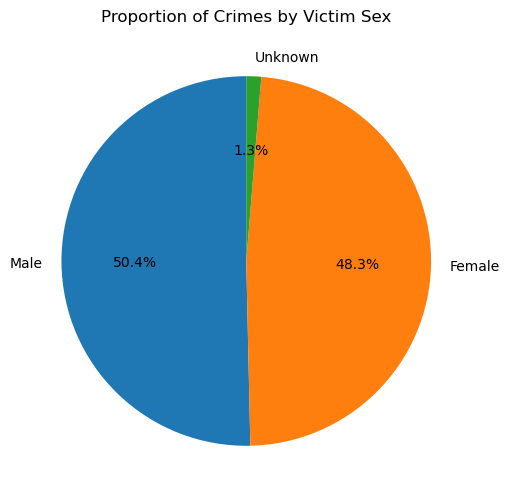

In [20]:
crime_by_sex = crime_la['victim_sex'].value_counts()

plt.figure(figsize=(10, 6))
labels = {'M': 'Male', 'F': 'Female', 'X': 'Unknown'}
plt.pie(crime_by_sex, labels = [labels[x] for x in crime_by_sex.index], autopct = '%1.1f%%', startangle = 90)
plt.title('Proportion of Crimes by Victim Sex')

plt.show()

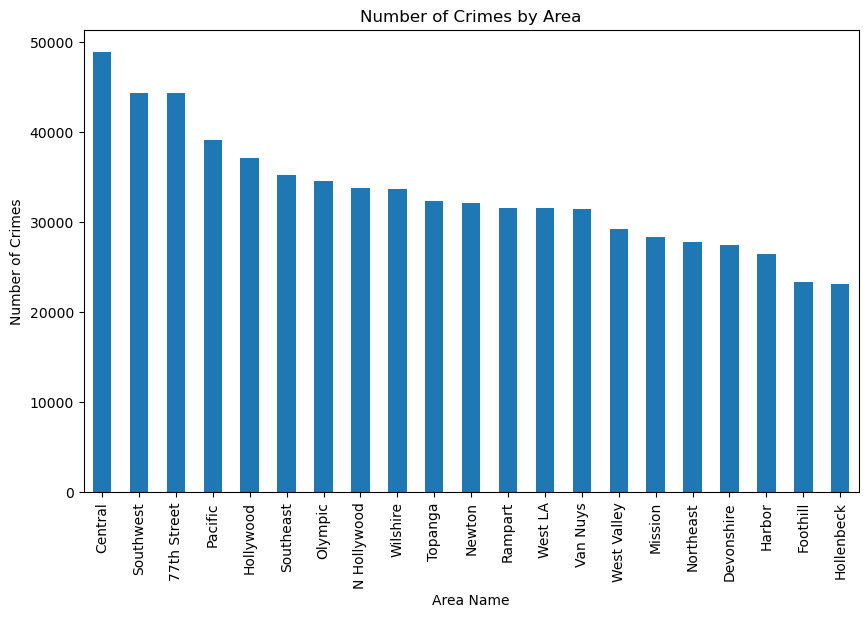

In [21]:
crime_by_area = crime_la['area_name'].value_counts()

plt.figure(figsize = (10, 6))
crime_by_area.plot(kind = 'bar')
plt.title('Number of Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')

plt.show()

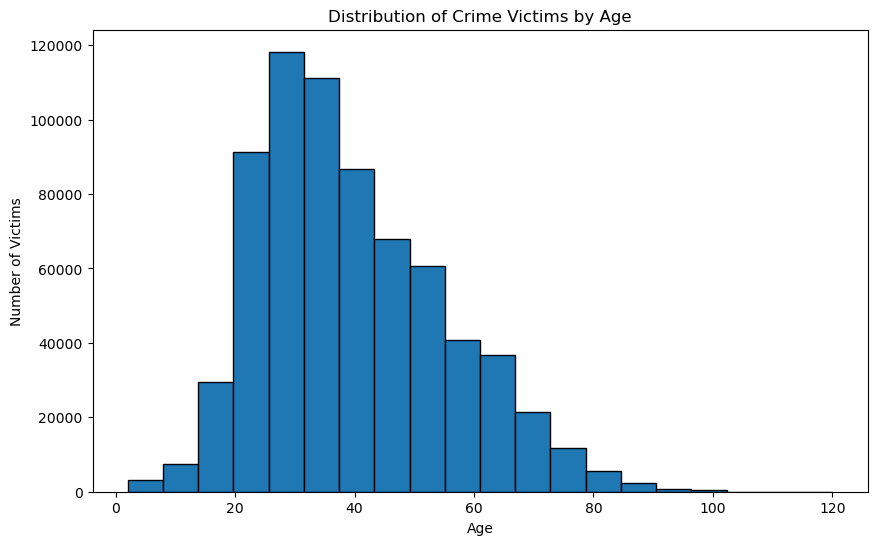

In [22]:
plt.figure(figsize = (10, 6))

plt.hist(crime_la['victim_age'], bins = 20, edgecolor = 'black')
plt.title('Distribution of Crime Victims by Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')

plt.show()

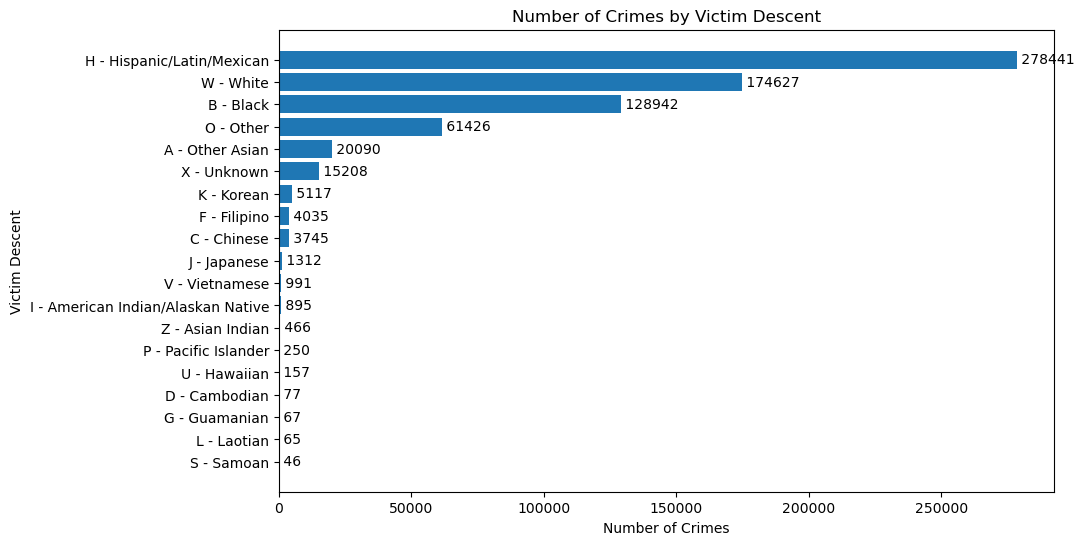

In [23]:
crime_by_descent = crime_la['victim_descent'].value_counts().sort_values(ascending = True)

descent_meanings = {
    'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian',
    'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean',
    'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan',
    'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'
}

labels_with_descriptions = [f"{idx} - {descent_meanings.get(idx, 'N/A')}" for idx in crime_by_descent.index]

plt.figure(figsize=(10, 6))
bars = plt.barh(crime_by_descent.index, crime_by_descent.values)
plt.title('Number of Crimes by Victim Descent')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Descent')
plt.yticks(ticks=crime_by_descent.index, labels = labels_with_descriptions)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {int(bar.get_width())}', va='center')

plt.show()

Total number of crimes: 695957
Crimes per year:
 year
2020    151356
2021    159156
2022    178873
2023    167899
2024     38673
Name: count, dtype: int64


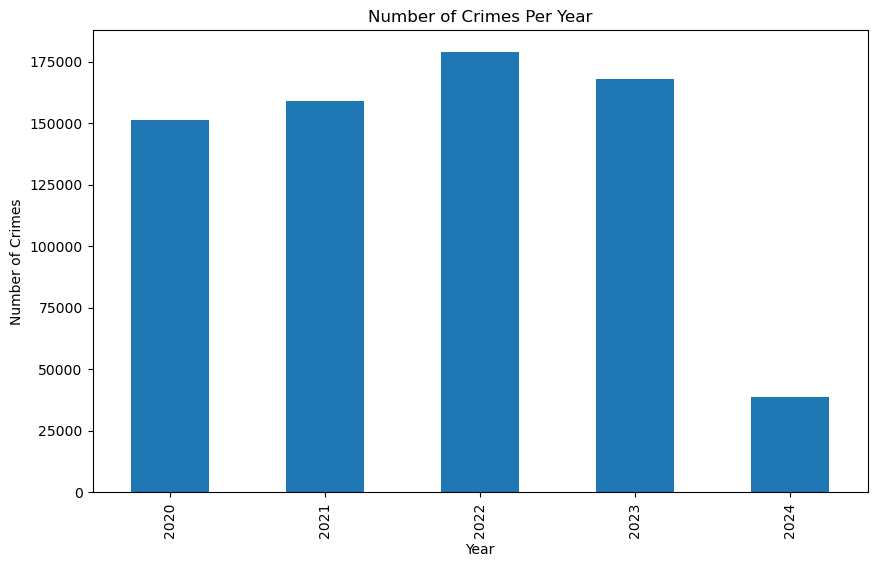

In [24]:
crime_la['year'] = crime_la['date_of_occurence'].dt.year

total_crimes = crime_la.shape[0]

crimes_per_year = crime_la['year'].value_counts().sort_index()

print("Total number of crimes:", total_crimes)
print("Crimes per year:\n", crimes_per_year)

plt.figure(figsize=(10, 6))
crimes_per_year.plot(kind = 'bar')
plt.title('Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

In [25]:
crime_la['year'] = crime_la['date_of_occurence'].dt.year

crimes_per_year = crime_la['year'].value_counts().sort_index()

if 2020 in crimes_per_year.index and 2023 in crimes_per_year.index:
    crimes_2020 = crimes_per_year[2020]
    crimes_2023 = crimes_per_year[2023]
    percent_increase = ((crimes_2023 - crimes_2020) / crimes_2020) * 100
    print(f"Crimes in 2020: {crimes_2020}")
    print(f"Crimes in 2023: {crimes_2023}")
    print(f"Percent increase from 2020 to 2023: {percent_increase:.2f}%")
else:
    print("Data for 2020 or 2023 is not available to calculate the increase.")


Crimes in 2020: 151356
Crimes in 2023: 167899
Percent increase from 2020 to 2023: 10.93%


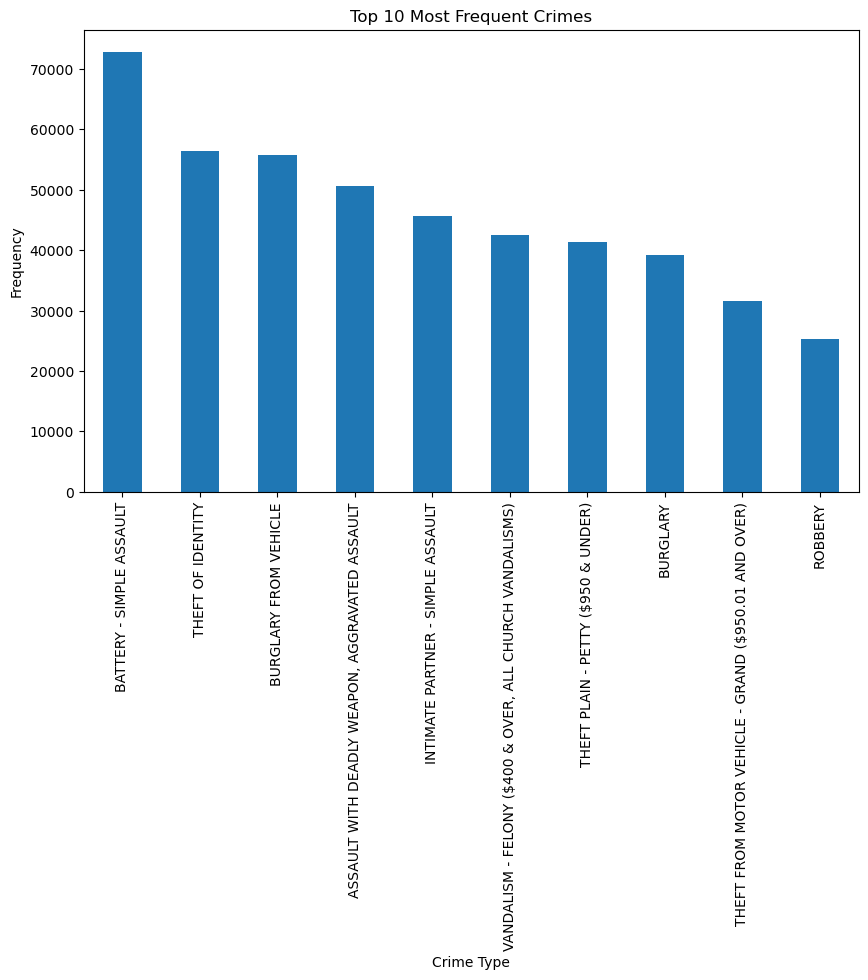

In [26]:
crime_frequencies = crime_la['crime_commited_description'].value_counts()

top_crimes = crime_frequencies.head(10)

plt.figure(figsize=(10, 6))
top_crimes.plot(kind = 'bar')
plt.title('Top 10 Most Frequent Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')

plt.show()

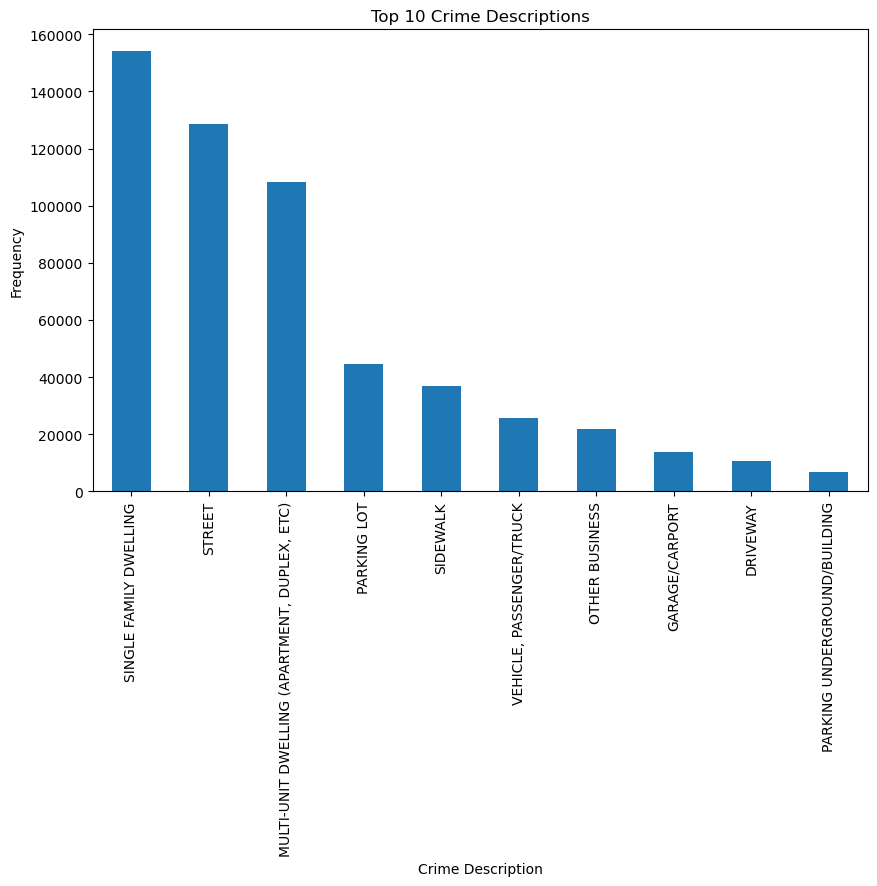

In [27]:
crime_description_frequencies = crime_la['crime_description'].value_counts()
top_crime_descriptions = crime_description_frequencies.head(10)

plt.figure(figsize = (10, 6))
top_crime_descriptions.plot(kind = 'bar')
plt.title('Top 10 Crime Descriptions')
plt.xlabel('Crime Description')
plt.ylabel('Frequency')

plt.show()

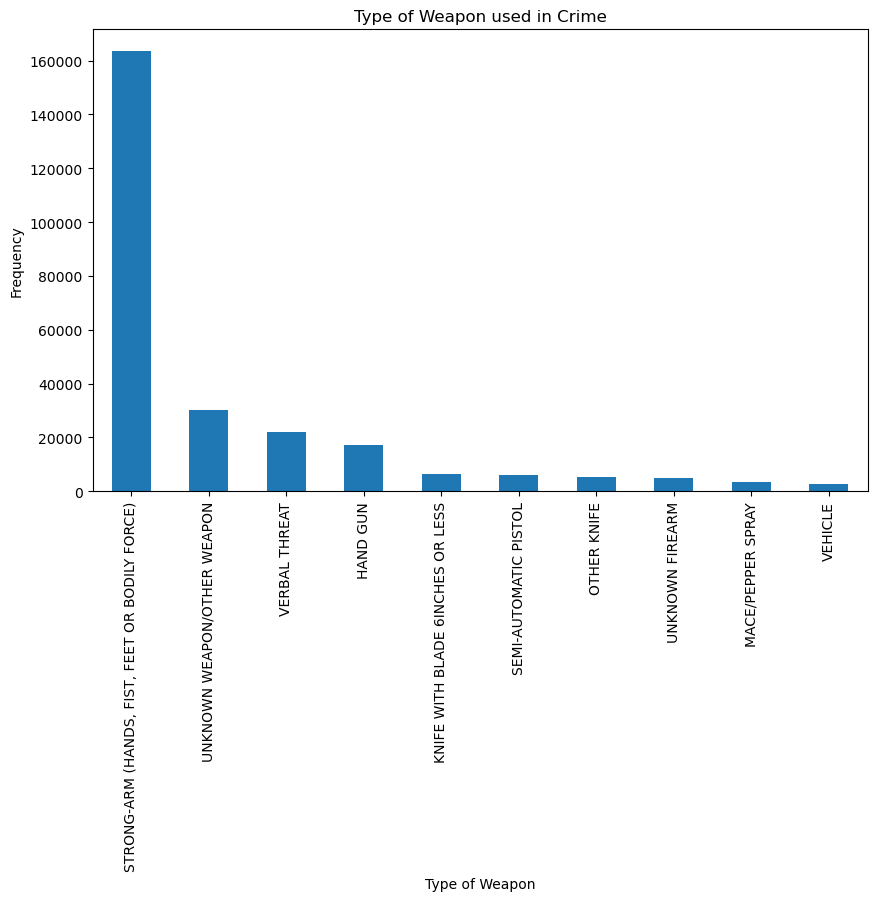

In [28]:
filtered_weapon_descriptions = crime_la[crime_la['weapon_description'] != 'NA']
filtered_weapon_descriptions = filtered_weapon_descriptions.dropna(subset=['weapon_description'])

type_of_weapon_used = filtered_weapon_descriptions['weapon_description'].value_counts()
type_of_weapon_used_desc = type_of_weapon_used.head(10)

plt.figure(figsize=(10, 6))
type_of_weapon_used_desc.plot(kind = 'bar')
plt.title('Type of Weapon used in Crime')
plt.xlabel('Type of Weapon')
plt.ylabel('Frequency')

plt.show()

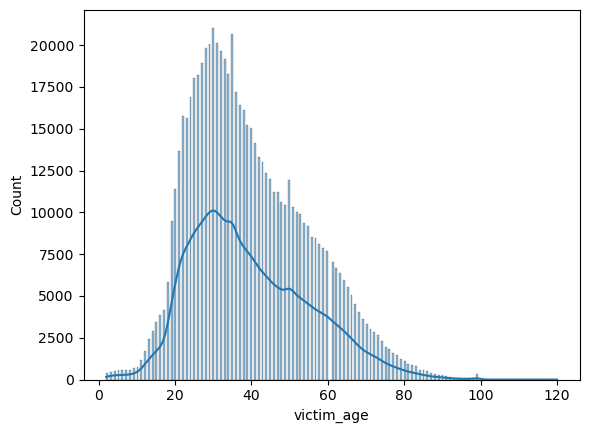

In [29]:
sns.histplot(data = crime_la, x = 'victim_age', kde = True)
plt.show()

In [30]:
crime_la['delay_reporting'] = (crime_la['date_reported'] - crime_la['date_of_occurence']).dt.days

avg_reporting_delay = crime_la['delay_reporting'].mean()
print('Average repoting delay: ',avg_reporting_delay)

Average repoting delay:  12.775649932395249


In [32]:
crime_la.to_excel('/Users/rush/Documents/Documents - Rushabh’s MacBook Air/Data/Crime Analysis LA /crime_la_final.xlsx')